In [1]:
import pandas as pd 
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('DelayedFlights.csv', index_col=0, parse_dates=['DepTime'])

C:\Users\38169\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            object 
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [5]:
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [6]:
### additional analysis of cancellation, cancellationcode and diverted features
df['CancellationCode'].value_counts()

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64

In [7]:
df[df['ArrDelay'].isna()].shape

(8387, 29)

In [8]:
pd.crosstab(df[df['ArrDelay'].isna()]['CancellationCode'],df[df['ArrDelay'].isna()]['Cancelled'])

Cancelled,0,1
CancellationCode,,
A,0,246
B,0,307
C,0,80
N,7754,0


In [9]:
df[df['ArrDelay'].isna()]['Diverted'].value_counts()

1    7754
0     633
Name: Diverted, dtype: int64

In [10]:
df[df['ArrDelay'].isna()].groupby(['Cancelled']).sum()['Diverted']

Cancelled
0    7754
1       0
Name: Diverted, dtype: int64

In [11]:
df['Diverted'].value_counts()

0    1929004
1       7754
Name: Diverted, dtype: int64

In [12]:
df['Cancelled'].value_counts()

0    1936125
1        633
Name: Cancelled, dtype: int64

In [13]:
#### all 'NA' ArrDelay values (8387) can be separated on: 
### 1. not cancelled flights (7754 of them with cancellation code N, which are actually diverted flights!!!! )
### 2. cancelled flights (633 of them with cancellation code A, B or C)

In [14]:
df['DepTime']

0          2003.0
1           754.0
2           628.0
4          1829.0
5          1940.0
            ...  
7009710    1250.0
7009717     657.0
7009718    1007.0
7009726    1251.0
7009727    1110.0
Name: DepTime, Length: 1936758, dtype: object

In [15]:
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [16]:
df.shape

(1936758, 29)

In [17]:
round(df.describe(),2)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758.00,1928371.00,1936560.00,...,1936758.00,1929648.00,1936303.00,1936758.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,2008.0,6.11,15.75,3.98,1467.47,1610.14,1634.22,2184.26,133.31,134.30,...,765.69,6.81,18.23,0.00,0.00,19.18,3.70,15.02,0.09,25.30
std,0.0,3.48,8.78,2.00,424.77,548.18,464.63,1944.70,72.06,71.34,...,574.48,5.27,14.34,0.02,0.06,43.55,21.49,33.83,2.02,42.05
min,2008.0,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,-25.00,...,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,1135.00,1316.00,1325.00,610.00,80.00,82.00,...,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,1510.00,1715.00,1705.00,1543.00,116.00,116.00,...,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,2008.0,9.00,23.00,6.00,1815.00,2030.00,2014.00,3422.00,165.00,165.00,...,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,2008.0,12.00,31.00,7.00,2359.00,2400.00,2400.00,9742.00,1114.00,660.00,...,4962.00,240.00,422.00,1.00,1.00,2436.00,1352.00,1357.00,392.00,1316.00


### Sta znace kolone? 

- Year 2008
- Month 1-12
- DayofMonth 1-31
- DayOfWeek 1 (Monday) - 7 (Sunday)
- DepTime actual departure time (local, hhmm)
- CRSDepTime scheduled departure time (local, hhmm)
- ArrTime actual arrival time (local, hhmm)
- CRSArrTime scheduled arrival time (local, hhmm)
- UniqueCarrier unique carrier code
- FlightNum flight number
- TailNum plane tail number: aircraft registration, unique aircraft identifier
- ActualElapsedTime in minutes
- CRSElapsedTime in minutes
- AirTime in minutes
- ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
- DepDelay departure delay, in minutes
- Origin origin IATA airport code
- Dest destination IATA airport code
- Distance in miles
- TaxiIn taxi in time, in minutes
- TaxiOut taxi out time in minutes
- Cancelled was the flight cancelled
- CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- Diverted 1 = yes, 0 = no
- CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
- WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
- NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
- SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [18]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [19]:
df.columns.to_list()

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [20]:
round(df[['CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']].describe(),2)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,19.18,3.70,15.02,0.09,25.30
std,43.55,21.49,33.83,2.02,42.05
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,2.00,0.00,2.00,0.00,8.00
75%,21.00,0.00,15.00,0.00,33.00
max,2436.00,1352.00,1357.00,392.00,1316.00


In [21]:
df['WeatherDelay'].value_counts()

0.0       1148570
10.0         2868
6.0          2738
15.0         2709
7.0          2527
           ...   
475.0           1
750.0           1
745.0           1
1352.0          1
510.0           1
Name: WeatherDelay, Length: 599, dtype: int64

In [22]:
### Droping na values for ArrDelay 

In [23]:
df.dropna(axis=0,subset=['ArrDelay'], inplace=True)

In [24]:
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

In [25]:
np.mean(df['WeatherDelay'])

3.7035706956700185

In [26]:
df['WeatherDelay']=df['WeatherDelay'].fillna(np.mean(df['WeatherDelay']))

In [27]:
df['CarrierDelay']=df['CarrierDelay'].fillna(np.mean(df['CarrierDelay']))

In [28]:
df['NASDelay']=df['NASDelay'].fillna(np.mean(df['NASDelay']))

In [29]:
df['SecurityDelay']=df['SecurityDelay'].fillna(np.mean(df['SecurityDelay']))

In [30]:
df['LateAircraftDelay']=df['LateAircraftDelay'].fillna(np.mean(df['LateAircraftDelay']))

In [31]:
df.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              3
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [32]:
df.dropna(axis=0, subset=['TailNum'], inplace=True)

In [33]:
### original df shape, before dealing with NA: 1936758

In [34]:
df.shape

(1928368, 29)

In [35]:
### correlation of attributes 

In [36]:
correlation_matrix=df.corr()

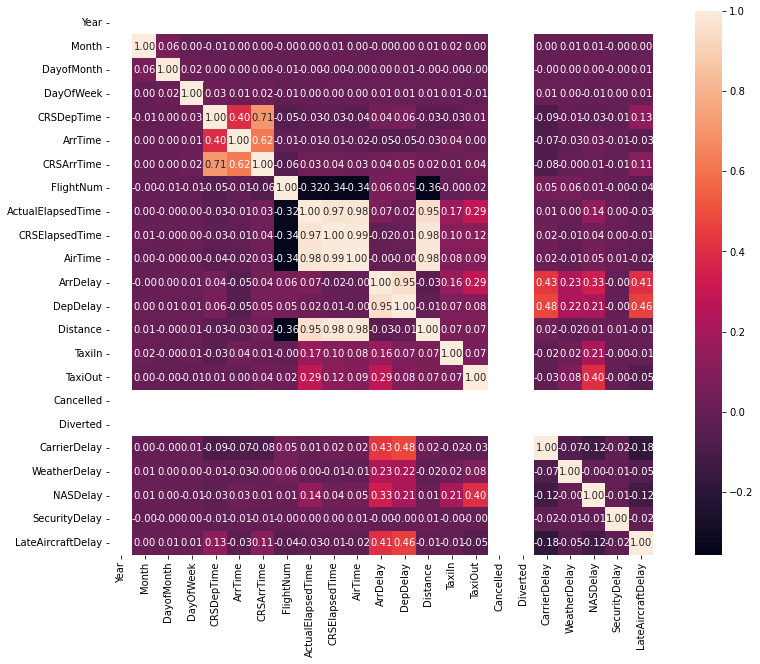

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, square=True, fmt='.2f')
plt.show()

In [38]:
df['Cancelled'].value_counts() 
### Since we excluded ~8K ArrDelay 'NA' values, we assume that feature 'Cancelled' doesn't have value 1 in the remaining set because 
### those excluded transaction had exactly value 1 for feature 'Cancelled'; Further, we conclude that for cancelled 

####flights there is no information about ArrDelay
 

0    1928368
Name: Cancelled, dtype: int64

In [39]:
df['Diverted'].value_counts()
### Similar conclusion can be drawn for attribute 'Diverted'

0    1928368
Name: Diverted, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928368 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            object 
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [41]:
df['CancellationCode'].value_counts()

N    1928368
Name: CancellationCode, dtype: int64

In [42]:
### In previous analysis, we mentioned that this set can be separated in three subset based on three different problems : 
### 1.diverted flights
### 2.cancelled flights
### 3.delayed flights
### We decided to continue investigating delayed flights which are transactions with not 'NA' ArrDelay values 

In [43]:
### since there is only 633 cancelled and 7754 diverted flights, and we want to predict ArrDelay, we decied to drop these columns

In [44]:
df.drop(['Diverted','Cancelled','CancellationCode'], axis=1, inplace=True)

In [45]:
correlation_matrix=df.corr()

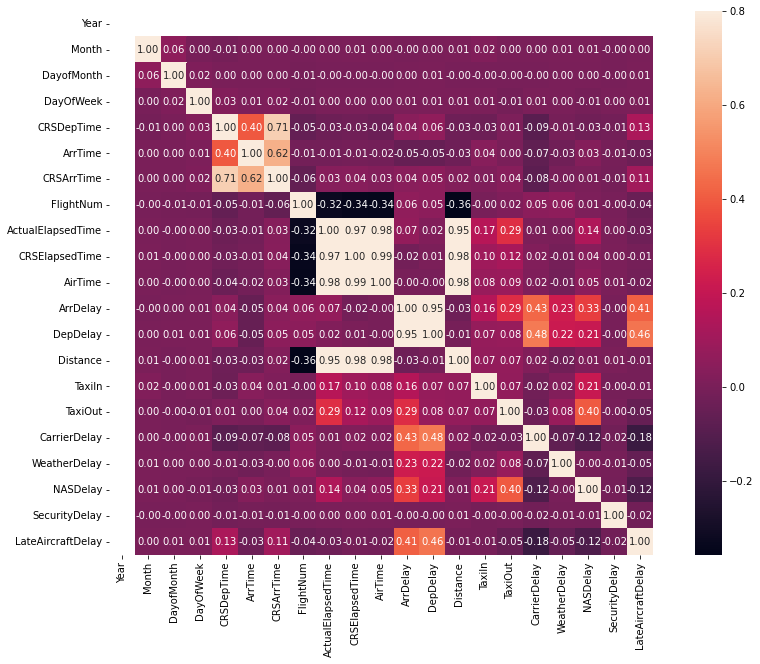

In [46]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmax=.8, annot=True, square=True, fmt='.2f')
plt.show()

In [47]:
df['Year'].value_counts()

2008    1928368
Name: Year, dtype: int64

In [48]:
display()

In [49]:
correlation_matrix[['ArrDelay','DepDelay']]

,ArrDelay,DepDelay
Year,NaN,NaN
Month,-0.000896,0.004234
DayofMonth,0.004124,0.005274
DayOfWeek,0.006121,0.008717
CRSDepTime,0.044449,0.059459
ArrTime,-0.050949,-0.052845
CRSArrTime,0.043079,0.054123
FlightNum,0.061263,0.052148
ActualElapsedTime,0.068130,0.018492
CRSElapsedTime,-0.015676,0.006836


In [50]:
round((df['ActualElapsedTime']-df['CRSElapsedTime']).describe(),2)

count    1928368.00
mean          -0.89
std           17.24
min         -181.00
25%          -10.00
50%           -3.00
75%            5.00
max          759.00
dtype: float64

In [51]:
round((df['CRSArrTime']-df['ArrTime']).describe(),2)

count    1928368.00
mean          23.95
std          447.69
min        -2399.00
25%          -89.00
50%          -30.00
75%           -7.00
max         2358.00
dtype: float64

In [52]:
round((df['CRSArrTime']-df['ArrTime']).describe(),2)

count    1928368.00
mean          23.95
std          447.69
min        -2399.00
25%          -89.00
50%          -30.00
75%           -7.00
max         2358.00
dtype: float64

In [53]:
round((df['ArrDelay']).describe(),2)

count    1928368.00
mean          42.20
std           56.78
min         -109.00
25%            9.00
50%           24.00
75%           56.00
max         2461.00
Name: ArrDelay, dtype: float64

In [54]:
df.drop(['Distance','AirTime'], axis=1, inplace=True)

In [55]:
correlation_matrix=df.corr()

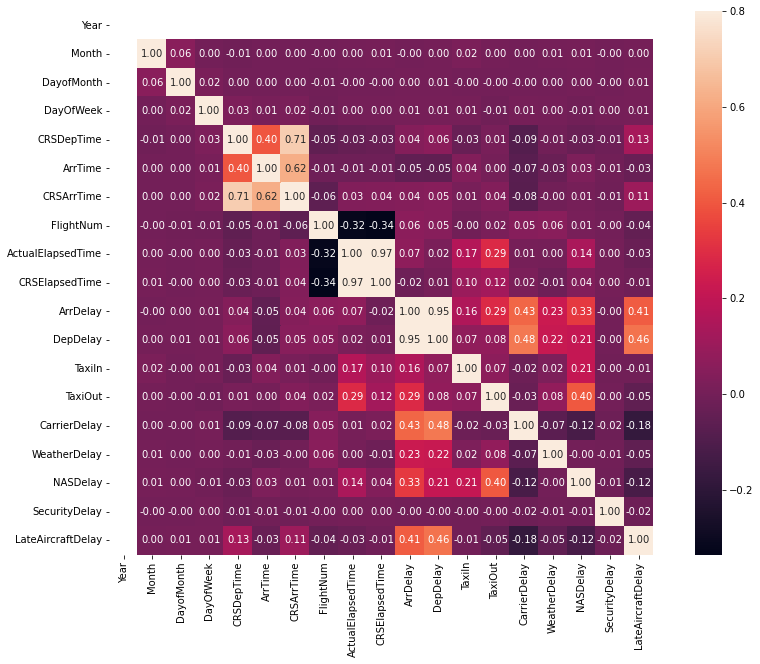

In [56]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmax=.8, annot=True, square=True, fmt='.2f')
plt.show()

In [57]:
df.drop(['DepDelay'], axis=1, inplace=True)

In [58]:
correlation_matrix=df.corr()

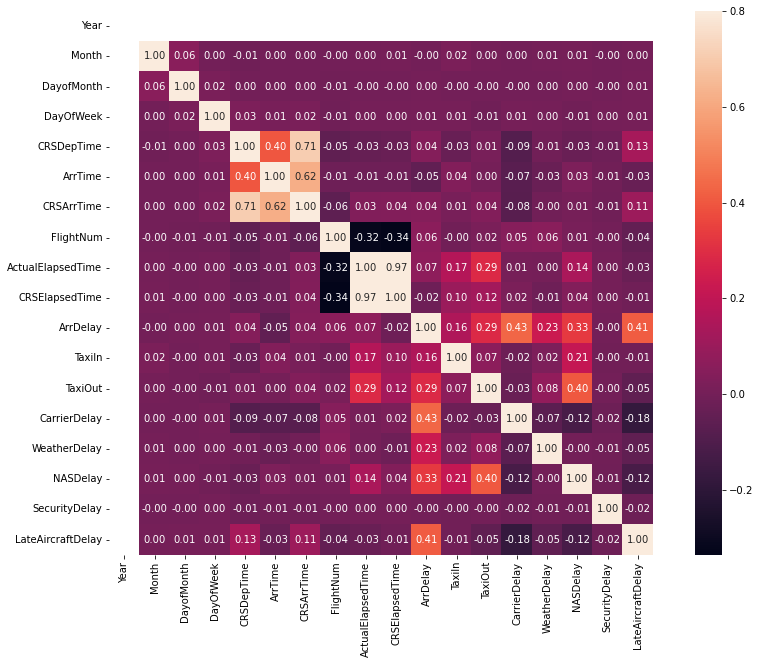

In [59]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmax=.8, annot=True, square=True, fmt='.2f')
plt.show()

In [60]:
df.drop(['Year'], axis=1, inplace=True)

In [61]:
### classification targets

In [62]:
df.loc[ df['ArrDelay'] < 15 ,'ArrDelay_target'] = 0
df.loc[ df['ArrDelay'] >= 15 ,'ArrDelay_target'] = 1

In [63]:
df['ArrDelay_target'] = df['ArrDelay_target'].astype('int')

In [64]:
df['ArrDelay_target'].value_counts()

1    1247486
0     680882
Name: ArrDelay_target, dtype: int64

In [65]:
### histograms

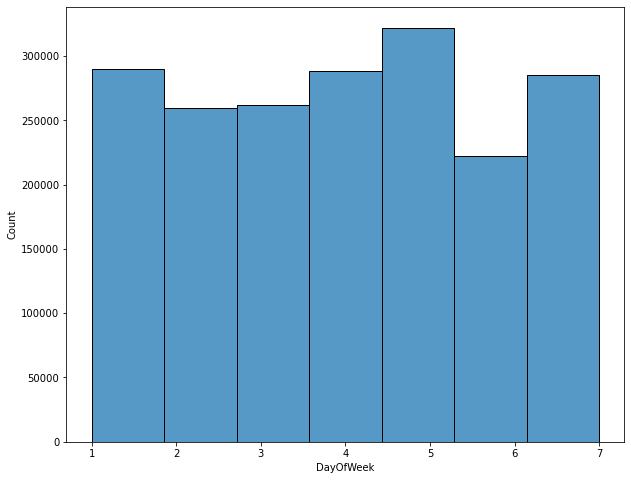

In [66]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="DayOfWeek",bins=7)
plt.xticks(range(1,8))
plt.show()

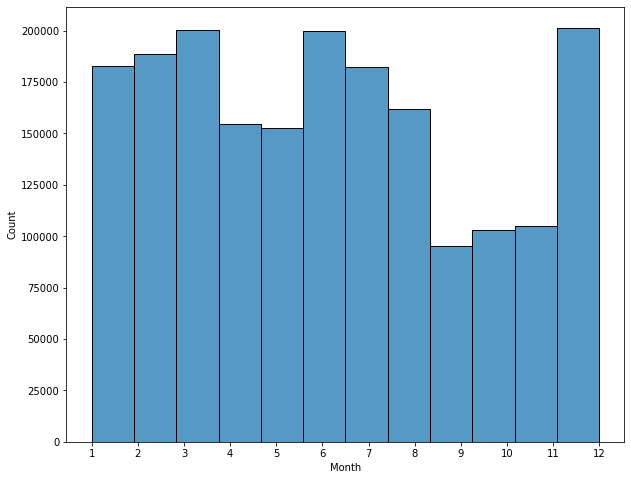

In [67]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="Month",bins=12)
plt.xticks(range(1,13))
plt.show()

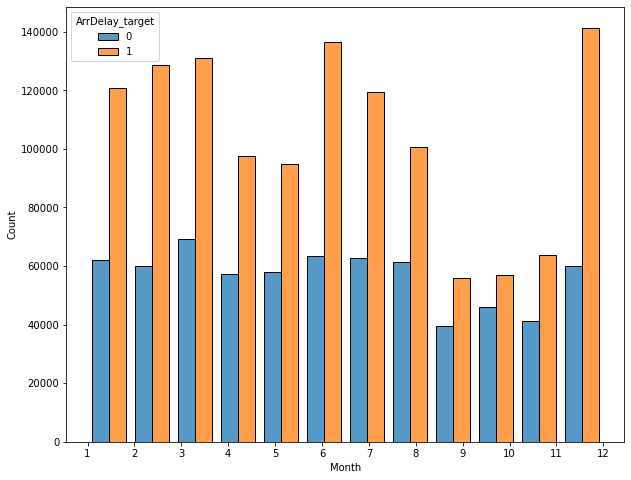

In [68]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="Month", hue="ArrDelay_target",bins=12, multiple="dodge", shrink=.8)
plt.xticks(range(1,13))
plt.show()

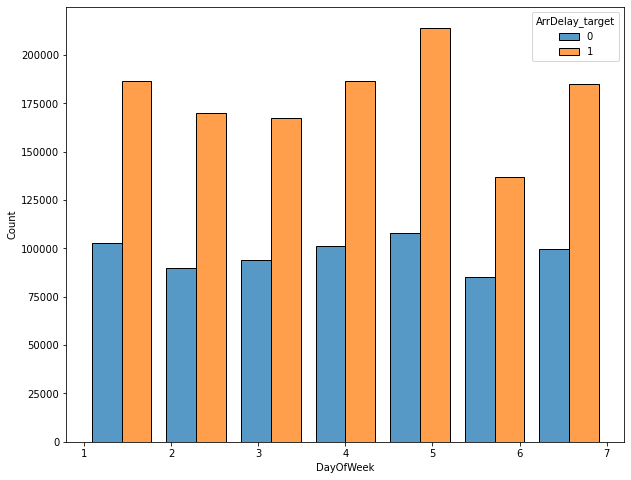

In [69]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="DayOfWeek", hue="ArrDelay_target",bins=7, multiple="dodge", shrink=.8)
plt.xticks(range(1,8))
plt.show()

In [70]:
df.loc[ df['ArrDelay'] < 30 ,'ArrDelay_target2'] = 0
df.loc[ df['ArrDelay'] >= 30 ,'ArrDelay_target2'] = 1

In [71]:
df['ArrDelay_target2'] = df['ArrDelay_target2'].astype('int')

In [72]:
df['ArrDelay_target'].value_counts()

1    1247486
0     680882
Name: ArrDelay_target, dtype: int64

In [73]:
df['ArrDelay_target2'].value_counts()

0    1077345
1     851023
Name: ArrDelay_target2, dtype: int64

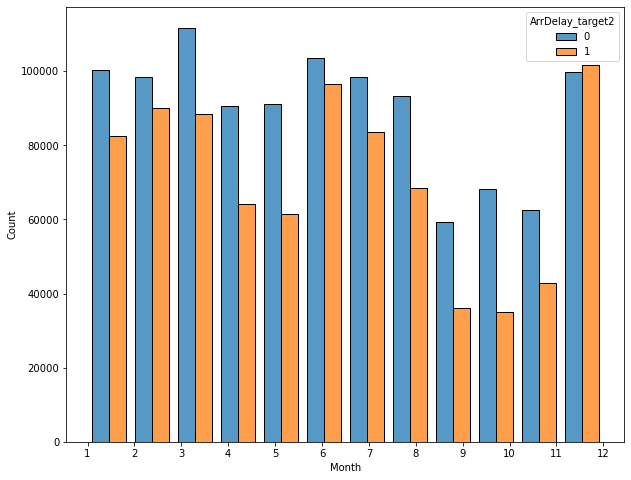

In [74]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="Month", hue="ArrDelay_target2",bins=12, multiple="dodge", shrink=.8)
plt.xticks(range(1,13))
plt.show()

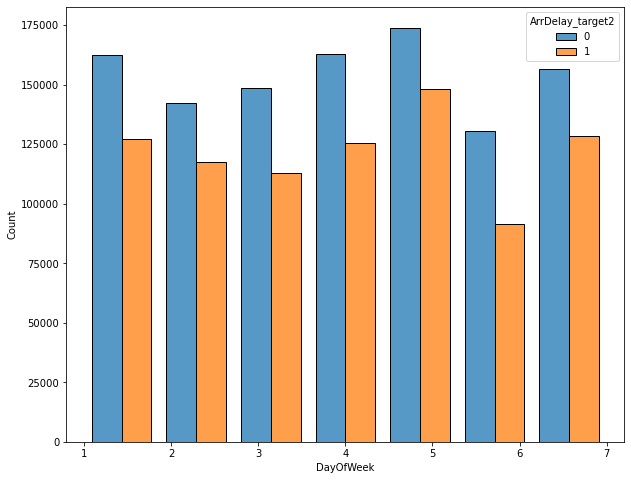

In [75]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="DayOfWeek", hue="ArrDelay_target2",bins=7, multiple="dodge", shrink=.8)
plt.xticks(range(1,8))
plt.show()

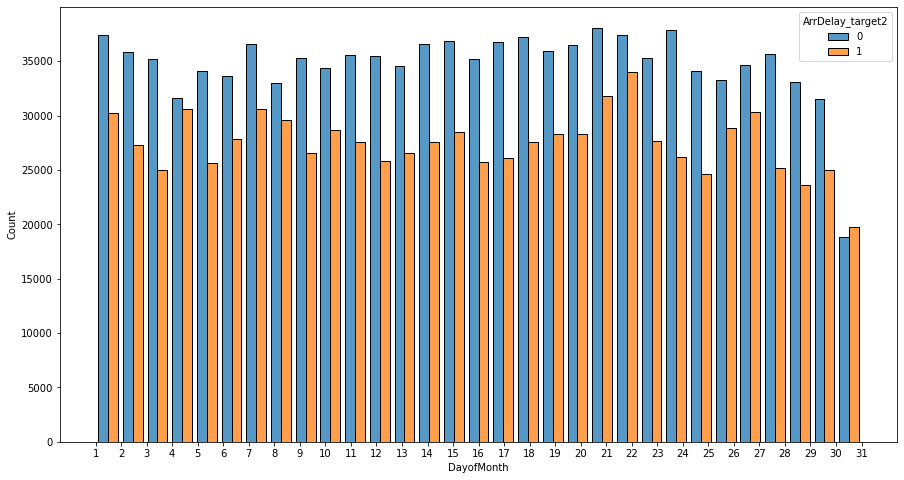

In [76]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x="DayofMonth", hue="ArrDelay_target2", multiple="dodge", shrink=.8, bins=31)
plt.xticks(range(1,32))
plt.show()

In [77]:
### Feature DayOfMonth not important....
### Features Month = 2, 6, 12 have a lot of delays
### Feature DayOfWeek = Friday has a lot of delays

In [78]:
df.drop(['DayofMonth'], axis=1, inplace=True)

In [79]:
df.head()

,Month,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,Dest,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_target,ArrDelay_target2
0,1,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,...,TPA,4.0,8.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0
1,1,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,...,TPA,5.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0
2,1,4,628.0,620,804.0,750,WN,448,N428WN,96.0,...,BWI,3.0,17.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0
4,1,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,...,BWI,3.0,10.0,2.000000,0.000000,0.000000,0.000000,32.000000,1,1
5,1,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,...,JAX,4.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0


In [80]:
df.loc[df['DayOfWeek'] == 5,'IsFriday'] = 1
df.loc[df['DayOfWeek'] != 5,'IsFriday'] = 0

In [81]:
df['DayOfWeek'].value_counts()

5    321982
1    289822
4    288343
7    284940
3    261498
2    259583
6    222200
Name: DayOfWeek, dtype: int64

In [82]:
df['IsFriday'].value_counts()

0.0    1606386
1.0     321982
Name: IsFriday, dtype: int64

In [83]:
df.loc[ df['Month'].isin([2,6,12]),  'Is_Feb_Jun_Dec']=1
df.loc[ ~df['Month'].isin([2,6,12]), 'Is_Feb_Jun_Dec']=0

In [84]:
df['Is_Feb_Jun_Dec'] = df['Is_Feb_Jun_Dec'].astype('int')

In [85]:
df["Is_Feb_Jun_Dec"].value_counts()

0    1338347
1     590021
Name: Is_Feb_Jun_Dec, dtype: int64

In [86]:
pd.crosstab(df["Is_Feb_Jun_Dec"], df["ArrDelay_target2"], normalize='columns')

ArrDelay_target2,0,1
Is_Feb_Jun_Dec,,
0,0.719936,0.661237
1,0.280064,0.338763


In [87]:
df.drop(['Month','DayOfWeek'], axis=1, inplace=True)

In [88]:
# drop CRSElapsedTime 

In [89]:
df.drop(['CRSElapsedTime'], axis=1, inplace=True)

In [90]:
df.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,ArrDelay,Origin,...,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_target,ArrDelay_target2,IsFriday,Is_Feb_Jun_Dec
0,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,-14.0,IAD,...,8.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0
1,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,2.0,IAD,...,10.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0
2,628.0,620,804.0,750,WN,448,N428WN,96.0,14.0,IND,...,17.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0
4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,34.0,IND,...,10.0,2.000000,0.000000,0.000000,0.000000,32.000000,1,1,0.0,0
5,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,11.0,IND,...,10.0,19.179399,3.703571,15.021635,0.090137,25.296466,0,0,0.0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928368 entries, 0 to 7009727
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DepTime            object 
 1   CRSDepTime         int64  
 2   ArrTime            float64
 3   CRSArrTime         int64  
 4   UniqueCarrier      object 
 5   FlightNum          int64  
 6   TailNum            object 
 7   ActualElapsedTime  float64
 8   ArrDelay           float64
 9   Origin             object 
 10  Dest               object 
 11  TaxiIn             float64
 12  TaxiOut            float64
 13  CarrierDelay       float64
 14  WeatherDelay       float64
 15  NASDelay           float64
 16  SecurityDelay      float64
 17  LateAircraftDelay  float64
 18  ArrDelay_target    int32  
 19  ArrDelay_target2   int32  
 20  IsFriday           float64
 21  Is_Feb_Jun_Dec     int32  
dtypes: float64(11), int32(3), int64(3), object(5)
memory usage: 316.3+ MB


In [92]:
df[['FlightNum','TailNum','UniqueCarrier','Dest','Origin']]

,FlightNum,TailNum,UniqueCarrier,Dest,Origin
0,335,N712SW,WN,TPA,IAD
1,3231,N772SW,WN,TPA,IAD
2,448,N428WN,WN,BWI,IND
4,3920,N464WN,WN,BWI,IND
5,378,N726SW,WN,JAX,IND
...,...,...,...,...,...
7009710,1621,N938DL,DL,ATL,MSP
7009717,1631,N3743H,DL,ATL,RIC
7009718,1631,N909DA,DL,IAH,ATL
7009726,1639,N646DL,DL,ATL,IAD


In [93]:
df["FlightNum"].nunique()

7498

In [94]:
df['TailNum'].nunique()

5360

In [95]:
df['UniqueCarrier'].nunique()

20

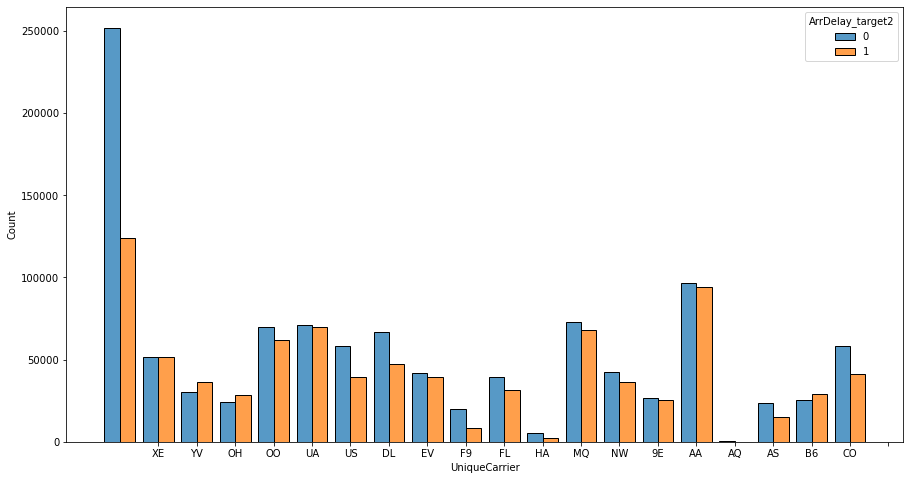

In [96]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x="UniqueCarrier", hue="ArrDelay_target2", multiple="dodge", shrink=.8, bins=20)
plt.xticks(range(1,21))
plt.show()

In [97]:
df['UniqueCarrier'].value_counts()

WN    376201
AA    190910
MQ    141223
UA    140904
OO    131780
DL    113728
XE    103147
CO     99731
US     98007
EV     81762
NW     78843
FL     70969
YV     66769
B6     54925
OH     52451
9E     51568
AS     39010
F9     28224
HA      7472
AQ       744
Name: UniqueCarrier, dtype: int64

In [98]:
ct=pd.crosstab(df["UniqueCarrier"], df["ArrDelay_target2"], normalize='columns')*100

In [99]:
df[df['UniqueCarrier']=='AA']['ArrDelay_target2'].value_counts(normalize=True)

0    0.505118
1    0.494882
Name: ArrDelay_target2, dtype: float64

In [100]:
df.groupby('UniqueCarrier')['ArrDelay'].mean().sort_values(ascending=False)

UniqueCarrier
YV    55.287049
B6    55.088739
OH    51.013250
XE    50.181217
UA    47.784399
EV    47.554255
9E    46.936453
AA    46.561553
OO    45.370587
MQ    45.295058
NW    43.911000
FL    43.683157
CO    40.568449
DL    39.881507
US    36.445019
AS    36.060882
HA    34.209449
WN    30.087884
F9    27.938953
AQ    21.255376
Name: ArrDelay, dtype: float64

In [101]:
df.groupby('UniqueCarrier')['CarrierDelay'].mean().sort_values(ascending=False)

UniqueCarrier
YV    33.177529
HA    27.624273
EV    26.491763
OH    25.265137
NW    24.611587
9E    23.545421
AQ    21.626985
AA    20.673806
AS    19.724881
DL    19.403355
US    18.725955
OO    18.700928
UA    18.392968
B6    18.139057
MQ    18.005544
CO    17.829588
XE    17.598537
F9    17.144478
WN    14.811688
FL    12.660875
Name: CarrierDelay, dtype: float64

In [102]:
df.groupby('UniqueCarrier')['WeatherDelay'].mean().sort_values(ascending=False)

UniqueCarrier
OH    13.730173
EV     8.043907
NW     5.052311
MQ     4.099166
9E     4.039278
YV     3.668734
CO     3.522352
XE     3.517422
OO     3.459296
AA     3.330902
WN     3.057028
DL     2.820179
AQ     2.802745
UA     2.714036
AS     2.639763
US     2.488524
F9     2.356564
HA     2.155398
B6     2.130955
FL     1.769071
Name: WeatherDelay, dtype: float64

In [103]:
df.groupby('UniqueCarrier')['TailNum','FlightNum'].nunique().sort_values(by='FlightNum',ascending=False)

<ipython-input-103-bd5f8e20a10e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('UniqueCarrier')['TailNum','FlightNum'].nunique().sort_values(by='FlightNum',ascending=False)


,TailNum,FlightNum
UniqueCarrier,,
WN,552,3973
OO,284,2609
AA,655,1936
US,373,1696
DL,460,1694
MQ,490,1683
EV,162,1588
OH,137,1553
XE,274,1547


In [104]:
df['FlightNum'].value_counts()

16      1575
50      1539
40      1499
15      1464
44      1440
        ... 
6914       1
6249       1
7458       1
6204       1
7688       1
Name: FlightNum, Length: 7498, dtype: int64

In [105]:
df[df['FlightNum']==16]['UniqueCarrier'].value_counts()

WN    365
CO    197
US    195
AA    176
B6    159
DL    142
HA    101
AS     89
FL     66
UA     45
XE     40
Name: UniqueCarrier, dtype: int64

In [107]:
df.groupby('UniqueCarrier')['TailNum'].nunique().sort_values(ascending=False)

UniqueCarrier
AA    655
WN    552
MQ    490
DL    460
UA    460
CO    377
US    373
NW    322
OO    284
XE    274
EV    162
9E    155
B6    153
FL    142
OH    137
AS    126
YV    126
F9     62
HA     32
AQ     20
Name: TailNum, dtype: int64

In [ ]:
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])

In [108]:
df[df['UniqueCarrier']=='AA']['ArrDelay_target2'].value_counts(normalize=True)

0    0.505118
1    0.494882
Name: ArrDelay_target2, dtype: float64

In [109]:
ct.sort_values(by=1, ascending=False)

ArrDelay_target2,0,1
UniqueCarrier,,
WN,23.395198,14.588795
AA,8.950893,11.101698
UA,6.618029,8.178980
MQ,6.780372,8.010947
OO,6.490864,7.267841
XE,4.767832,6.084559
DL,6.182885,5.536513
CO,5.408388,4.872254
EV,3.901721,4.668146


In [110]:
pd.crosstab(df["TaxiIn"], df["ArrDelay_target2"], normalize='columns').sort_values(by=1, axis=1)

ArrDelay_target2,1,0
TaxiIn,,
0.0,0.000067,0.000058
1.0,0.003293,0.004027
2.0,0.035345,0.048353
3.0,0.105240,0.134589
4.0,0.150911,0.180860
...,...,...
199.0,0.000001,0.000000
200.0,0.000002,0.000000
207.0,0.000001,0.000000


In [111]:
df.drop(['TailNum','FlightNum'], axis=1, inplace=True)

In [112]:
unique_carrier=df['UniqueCarrier'].unique()

In [113]:
unique_carrier

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [114]:
shape=df.shape[0]

In [115]:
shape

1928368

In [128]:
df.groupby(['Origin'])['ArrDelay_target2'].sum().sort_values(ascending=False)[:20]

Origin
ORD    67551
ATL    57650
DFW    40617
DEN    30014
EWR    27401
IAH    21748
SFO    21725
LAX    21383
DTW    21230
LAS    19240
PHX    19006
JFK    18606
LGA    17314
CLT    15804
MCO    15241
MSP    14877
BOS    14824
PHL    14411
BWI    11536
IAD    11511
Name: ArrDelay_target2, dtype: int32

In [129]:
df['Origin'].nunique()

303

In [130]:
df['Dest'].nunique()

302

In [122]:
df.groupby(['Dest'])['ArrDelay_target2'].sum().sort_values(ascending=False)

Dest
ORD    62559
ATL    50007
EWR    32753
DFW    31106
SFO    25211
       ...  
INL        6
BJI        4
BLI        2
PIR        1
TUP        0
Name: ArrDelay_target2, Length: 302, dtype: int32

In [125]:
carrier_avg_taxiOut = df['TaxiOut'].groupby(df['UniqueCarrier']).mean()

In [153]:
carrier_avg_delay = df['ArrDelay'].groupby(df['UniqueCarrier']).mean()

In [154]:
carrier_avg_delay

UniqueCarrier
9E    46.936453
AA    46.561553
AQ    21.255376
AS    36.060882
B6    55.088739
CO    40.568449
DL    39.881507
EV    47.554255
F9    27.938953
FL    43.683157
HA    34.209449
MQ    45.295058
NW    43.911000
OH    51.013250
OO    45.370587
UA    47.784399
US    36.445019
WN    30.087884
XE    50.181217
YV    55.287049
Name: ArrDelay, dtype: float64

In [155]:
for carrier, delay in zip(carrier_avg_delay.index, carrier_avg_delay.values):
    df.loc[df['UniqueCarrier']==carrier,'carrier_avg_delay']=delay

In [156]:
df['carrier_avg_delay'].value_counts()

30.087884    376201
46.561553    190910
45.295058    141223
47.784399    140904
45.370587    131780
39.881507    113728
50.181217    103147
40.568449     99731
36.445019     98007
47.554255     81762
43.911000     78843
43.683157     70969
55.287049     66769
55.088739     54925
51.013250     52451
46.936453     51568
36.060882     39010
27.938953     28224
34.209449      7472
21.255376       744
Name: carrier_avg_delay, dtype: int64

In [139]:
df['UniqueCarrier'].unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [146]:
df['TaxiIn'].value_counts()

4.0      323278
5.0      313896
6.0      239536
3.0      234561
7.0      177783
          ...  
184.0         1
149.0         1
150.0         1
176.0         1
186.0         1
Name: TaxiIn, Length: 180, dtype: int64

In [147]:
df['Origin'].value_counts()

ATL    131213
ORD    125451
DFW     95058
DEN     74033
LAX     58545
        ...  
BJI         4
PIR         3
PUB         2
INL         1
TUP         1
Name: Origin, Length: 303, dtype: int64

In [157]:
origin_avg_delay=df['ArrDelay'].groupby(df['Origin']).mean()

In [159]:
dest_avg_delay=df['ArrDelay'].groupby(df['Dest']).mean()

In [160]:
dest_avg_delay

Dest
ABE    48.837262
ABI    36.634409
ABQ    32.134128
ABY    46.761006
ACK    59.167742
         ...    
WYS    23.741935
XNA    46.788195
YAK    53.007968
YKM    26.744681
YUM    35.625767
Name: ArrDelay, Length: 302, dtype: float64

In [158]:
origin_avg_delay

Origin
ABE    60.820404
ABI    66.369898
ABQ    33.597238
ABY    50.907534
ACK    66.040816
         ...    
WYS    18.300000
XNA    57.084927
YAK    54.879397
YKM    25.581818
YUM    34.467249
Name: ArrDelay, Length: 303, dtype: float64

In [158]:
origin_avg_delay

Origin
ABE    60.820404
ABI    66.369898
ABQ    33.597238
ABY    50.907534
ACK    66.040816
         ...    
WYS    18.300000
XNA    57.084927
YAK    54.879397
YKM    25.581818
YUM    34.467249
Name: ArrDelay, Length: 303, dtype: float64

In [161]:
for origin, delay in zip(origin_avg_delay.index, origin_avg_delay.values):
    df.loc[df['Origin']==origin,'origin_avg_delay']=delay

In [162]:
for dest, delay in zip(dest_avg_delay.index, dest_avg_delay.values):
    df.loc[df['Dest']==dest,'dest_avg_delay']=delay

In [163]:
df['origin_avg_delay'].value_counts()

40.782994    131213
50.954747    125451
37.757864     95058
36.191617     74033
33.849671     58545
              ...  
33.000000         4
39.333333         3
74.000000         2
15.000000         1
6.000000          1
Name: origin_avg_delay, Length: 303, dtype: int64

In [165]:
df['Origin'].value_counts()

ATL    131213
ORD    125451
DFW     95058
DEN     74033
LAX     58545
        ...  
BJI         4
PIR         3
PUB         2
INL         1
TUP         1
Name: Origin, Length: 303, dtype: int64

In [164]:
df['dest_avg_delay'].value_counts()

60.028153    108265
47.898827    106540
43.166398     70181
37.506698     62850
36.752268     59843
              ...  
22.846154        13
20.666667        12
66.777778         9
15.000000         3
6.000000          1
Name: dest_avg_delay, Length: 302, dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928368 entries, 0 to 7009727
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DepTime            object 
 1   CRSDepTime         int64  
 2   ArrTime            float64
 3   CRSArrTime         int64  
 4   UniqueCarrier      object 
 5   ActualElapsedTime  float64
 6   ArrDelay           float64
 7   Origin             object 
 8   Dest               object 
 9   TaxiIn             float64
 10  TaxiOut            float64
 11  CarrierDelay       float64
 12  WeatherDelay       float64
 13  NASDelay           float64
 14  SecurityDelay      float64
 15  LateAircraftDelay  float64
 16  ArrDelay_target    int32  
 17  ArrDelay_target2   int32  
 18  IsFriday           float64
 19  Is_Feb_Jun_Dec     int32  
 20  carrier_avg_delay  float64
 21  origin_avg_delay   float64
 22  dest_avg_delay     float64
dtypes: float64(14), int32(3), int64(2), object(4)
memory usage: 331.0+ MB


In [167]:
df.drop(['UniqueCarrier','Origin','Dest'], axis=1, inplace=True)

In [168]:
df.shape

(1928368, 20)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928368 entries, 0 to 7009727
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DepTime            object 
 1   CRSDepTime         int64  
 2   ArrTime            float64
 3   CRSArrTime         int64  
 4   ActualElapsedTime  float64
 5   ArrDelay           float64
 6   TaxiIn             float64
 7   TaxiOut            float64
 8   CarrierDelay       float64
 9   WeatherDelay       float64
 10  NASDelay           float64
 11  SecurityDelay      float64
 12  LateAircraftDelay  float64
 13  ArrDelay_target    int32  
 14  ArrDelay_target2   int32  
 15  IsFriday           float64
 16  Is_Feb_Jun_Dec     int32  
 17  carrier_avg_delay  float64
 18  origin_avg_delay   float64
 19  dest_avg_delay     float64
dtypes: float64(14), int32(3), int64(2), object(1)
memory usage: 286.9+ MB


In [172]:
df.drop('DepTime', axis=1, inplace=True)